In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
dbscan_2244 = pd.read_csv('apogee_data/2244_apogeedbscan.csv')
dbscan_2244.head()

,FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA_1,...,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist,g_mag_error,distance_pc,labels,is_core,Separation
0,apStar-dr17-2M06275431+0513530.fits,2M06275431+0513530,apo25m.HD46375.2M06275431+0513530,apogee.apo25m.stars.HD46375.2M06275431+0513530,apogee.apo25m.synspec_fix.HD46375.2M06275431+0...,apo25m,4411,HD46375,none,96.976315,...,0.7726,0.7654,0.7814,A,1.103516,0.000828,1913.356450,0,False,59.525398
1,apStar-dr17-2M06291880+0440353.fits,2M06291880+0440353,apo25m.HD46375.2M06291880+0440353,apogee.apo25m.stars.HD46375.2M06291880+0440353,apogee.apo25m.synspec_fix.HD46375.2M06291880+0...,apo25m,4411,HD46375,none,97.328370,...,NaN,NaN,NaN,NaN,0.754614,0.002296,1447.108618,0,False,30.861932
2,apStar-dr17-2M06292361+0510471.fits,2M06292361+0510471,apo25m.Rosette_btx.2M06292361+0510471,apogee.apo25m.stars.Rosette_btx.2M06292361+051...,apogee.apo25m.synspec_fix.Rosette_btx.2M062923...,apo25m,6213,Rosette_btx,none,97.348398,...,NaN,NaN,NaN,NaN,0.743063,0.003007,1566.801028,0,True,0.054780
3,apStar-dr17-2M06293121+0509527.fits,2M06293121+0509527,apo25m.HD46375.2M06293121+0509527,apogee.apo25m.stars.HD46375.2M06293121+0509527,apogee.apo25m.synspec_fix.HD46375.2M06293121+0...,apo25m,4411,HD46375,none,97.380053,...,NaN,NaN,NaN,NaN,0.718304,0.001955,1511.028786,0,False,55.567663
4,asStar-dr17-2M06301603+0357000.fits,2M06301603+0357000,lco25m.206-02-C.2M06301603+0357000,apogee.lco25m.stars.206-02-C.2M06301603+0357000,apogee.lco25m.synspec_fix.206-02-C.2M06301603+...,lco25m,5939,206-02-C,none,97.566805,...,0.6810,0.6486,0.7054,MARCS,1.076062,0.001555,1993.644174,0,False,31.335066


In [47]:
cantat_2244 = pd.read_csv('apogee_data/2244_apogeecantat.csv')
cantat_2244.head()

,FILE,APOGEE_ID,TARGET_ID,APSTAR_ID,ASPCAP_ID,TELESCOPE,LOCATION_ID,FIELD,ALT_ID,RA_1,...,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,dist,pmra_over_error,pmdec_over_error,PMemb,Separation
0,apStar-dr17-2M06293478+0457333.fits,2M06293478+0457333,apo25m.Rosette_btx.2M06293478+0457333,apogee.apo25m.stars.Rosette_btx.2M06293478+045...,apogee.apo25m.synspec_fix.Rosette_btx.2M062934...,apo25m,6213,Rosette_btx,none,97.394935,...,NaN,206.021342,-2.580199,97.761025,-18.281006,0.649263,16.618191,6.189952,0.6,0.083953
1,apStar-dr17-2M06293984+0457386.fits,2M06293984+0457386,apo25m.Rosette_btx.2M06293984+0457386,apogee.apo25m.stars.Rosette_btx.2M06293984+045...,apogee.apo25m.synspec_fix.Rosette_btx.2M062939...,apo25m,6213,Rosette_btx,none,97.416012,...,NaN,206.043516,-2.552597,97.797924,-18.286011,0.614171,99.144714,55.515434,0.1,57.779490
2,asStar-dr17-2M06295444+0436276.fits,2M06295444+0436276,lco25m.206-02-C.2M06295444+0436276,apogee.lco25m.stars.206-02-C.2M06295444+0436276,apogee.lco25m.synspec_fix.206-02-C.2M06295444+...,lco25m,5939,206-02-C,none,97.476874,...,NaN,206.384506,-2.663366,97.880390,-18.635560,0.637290,0.275924,0.449760,0.1,53.490861
3,asStar-dr17-2M06300299+0432387.fits,2M06300299+0432387,lco25m.206-02-C.2M06300299+0432387,apogee.lco25m.stars.206-02-C.2M06300299+0432387,apogee.lco25m.synspec_fix.206-02-C.2M06300299+...,lco25m,5939,206-02-C,none,97.512479,...,NaN,206.455292,-2.677858,97.905261,-18.703785,0.658159,38.851643,16.788134,0.2,53.491748
4,apStar-dr17-2M06301984+0452214.fits,2M06301984+0452214,apo25m.Rosette_btx.2M06301984+0452214,apogee.apo25m.stars.Rosette_btx.2M06301984+045...,apogee.apo25m.synspec_fix.Rosette_btx.2M063019...,apo25m,6213,Rosette_btx,none,97.582680,...,NaN,206.184751,-2.454305,97.962766,-18.357305,0.462508,21.579502,2.204903,0.4,0.044426


In [5]:
interested_columns = ['FE_H', 'C_FE', 'CU_FE', 'N_FE', 'O_FE',
                     'MG_FE', 'AL_FE', 'SI_FE', 'P_FE', 'S_FE',
                     'K_FE', 'CA_FE', 'TI_FE', 'TIII_FE', 'V_FE',
                     'CR_FE', 'MN_FE', 'CO_FE', 'NI_FE']
dbscan_2244.loc[:, interested_columns].head()

,FE_H,C_FE,CU_FE,N_FE,O_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE
0,0.229950,-0.056786,NaN,0.228190,0.023750,-0.005845,0.066671,-0.049394,NaN,-0.127418,-0.354601,-0.040259,0.002266,-0.058505,-0.005248,0.099584,0.035282,-0.174823,0.006903
1,-0.396520,0.241460,NaN,0.612620,0.066048,0.086977,0.123501,0.054548,NaN,0.076952,0.113389,0.015475,-0.060042,-0.011041,-0.301618,0.003374,-0.032618,-0.043630,-0.018037
2,-0.439040,-0.009052,NaN,NaN,-0.120337,-0.169272,NaN,-0.076307,NaN,NaN,0.190533,-0.040191,-0.270951,NaN,NaN,NaN,NaN,NaN,0.151840
3,0.004588,0.001180,NaN,0.136843,0.068533,0.080283,0.053113,0.015269,NaN,0.083930,-0.074109,0.009859,0.033689,0.127782,-0.757226,-0.045959,-0.033746,-0.119548,0.009192
4,-0.235940,0.147080,NaN,-0.498140,0.122943,-0.094002,-0.003444,0.136810,NaN,-0.006017,-0.121327,-0.427264,NaN,NaN,0.330351,-0.259122,-0.255897,NaN,-0.128570


[]

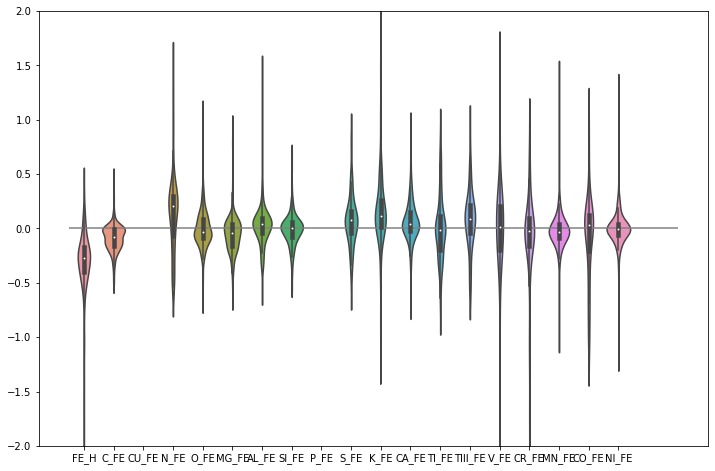

In [67]:
plt.figure(figsize = (12,8))
plt.hlines(0, -0.5, 20, color = 'grey')
sns.violinplot(data = dbscan_2244.loc[:, interested_columns])
plt.ylim(-2,2)
plt.plot()

[]

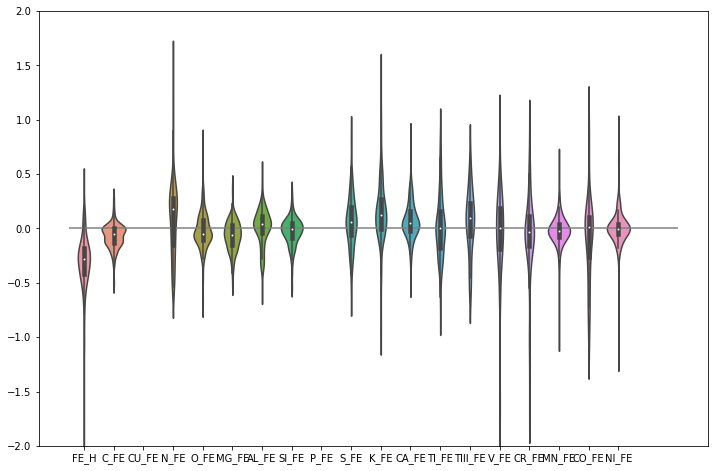

In [66]:
plt.figure(figsize = (12,8))
plt.hlines(0, -0.5, 20, color = 'grey')
sns.violinplot(data = cantat_2244.loc[:, interested_columns])
plt.ylim(-2, 2)
plt.plot()

In [20]:
data_list = np.array([dbscan_2244[column].to_numpy() for column in interested_columns])
abundance = data_list.flatten()

In [21]:
metal = np.repeat(interested_columns, len(dbscan_2244))

In [22]:
plot_data_dbscan = pd.DataFrame({
    'Metal': metal,
    'Abundance': abundance
})

In [62]:
plot_data_dbscan.head()

,Metal,Abundance
0,FE_H,0.229950
1,FE_H,-0.396520
2,FE_H,-0.439040
3,FE_H,0.004588
4,FE_H,-0.235940


In [63]:
merged_data = pd.concat([dbscan_2244.loc[:, interested_columns].assign(data = 'dbscan'),
                       cantat_2244.loc[:, interested_columns].assign(data = 'cantat')])
merged_data.head()

,FE_H,C_FE,CU_FE,N_FE,O_FE,MG_FE,AL_FE,SI_FE,P_FE,S_FE,K_FE,CA_FE,TI_FE,TIII_FE,V_FE,CR_FE,MN_FE,CO_FE,NI_FE,data
0,0.229950,-0.056786,NaN,0.228190,0.023750,-0.005845,0.066671,-0.049394,NaN,-0.127418,-0.354601,-0.040259,0.002266,-0.058505,-0.005248,0.099584,0.035282,-0.174823,0.006903,dbscan
1,-0.396520,0.241460,NaN,0.612620,0.066048,0.086977,0.123501,0.054548,NaN,0.076952,0.113389,0.015475,-0.060042,-0.011041,-0.301618,0.003374,-0.032618,-0.043630,-0.018037,dbscan
2,-0.439040,-0.009052,NaN,NaN,-0.120337,-0.169272,NaN,-0.076307,NaN,NaN,0.190533,-0.040191,-0.270951,NaN,NaN,NaN,NaN,NaN,0.151840,dbscan
3,0.004588,0.001180,NaN,0.136843,0.068533,0.080283,0.053113,0.015269,NaN,0.083930,-0.074109,0.009859,0.033689,0.127782,-0.757226,-0.045959,-0.033746,-0.119548,0.009192,dbscan
4,-0.235940,0.147080,NaN,-0.498140,0.122943,-0.094002,-0.003444,0.136810,NaN,-0.006017,-0.121327,-0.427264,NaN,NaN,0.330351,-0.259122,-0.255897,NaN,-0.128570,dbscan


[]

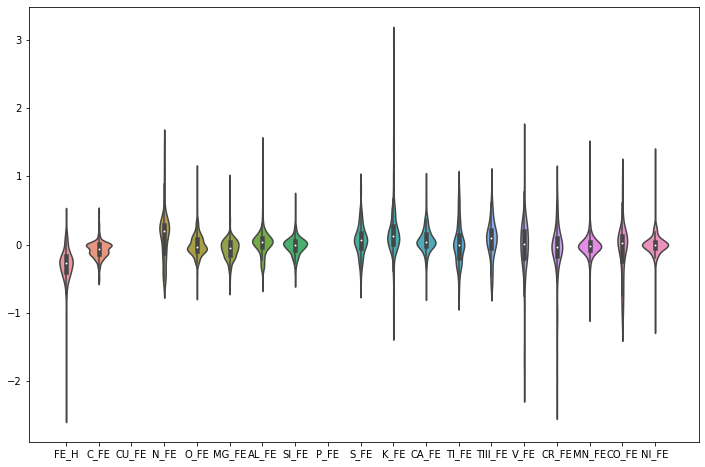

In [45]:
plt.figure(figsize = (12,8))
sns.violinplot(data = merged_data)
plt.plot()